# Proceso estándar de regresión

1. Separar datos de entrenamiento / prueba
2. Normalizar datos / Crear un normalizador
3. Crear modelo (NN)
4. Entrenar
5. Evaluar resultados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
# Optimizador
from tensorflow.keras.optimizers import Adam

In [3]:
# asegurar que los resultados sean "reproducibles"
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

### Datos de entrenamiento / prueba

In [4]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [6]:
X_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,4,90.0,75.0,2125.0,14.5,74,0,0,1
1,4,140.0,88.0,2890.0,17.3,79,0,0,1
2,8,350.0,160.0,4456.0,13.5,72,0,0,1
3,4,105.0,63.0,2125.0,14.7,82,0,0,1
4,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
309,6,200.0,85.0,2990.0,18.2,79,0,0,1
310,8,400.0,180.0,4220.0,11.1,77,0,0,1
311,4,108.0,93.0,2391.0,15.5,74,0,1,0
312,4,83.0,61.0,2003.0,19.0,74,0,1,0


### Normalización

In [5]:
def crear_normalizador(datos):
    normalizer = Normalization(axis=-1)
    normalizer.adapt(np.array(datos))
    return normalizer

In [6]:
normalizador = crear_normalizador(X_train)

### Creación Red Neuronal

In [7]:
def crear_nn_regresion(norm):
    model = Sequential([
        norm,
        Dense(18, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(18, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=Adam(0.001))
    return model

In [8]:
nn = crear_nn_regresion(normalizador)

### Entrenamiento del modelo

In [9]:
history = nn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1,
    epochs=200
)


Epoch 1/200
8/8 [==============================] - 2s 62ms/step - loss: 22.9090 - val_loss: 23.1681
Epoch 2/200
8/8 [==============================] - 0s 13ms/step - loss: 22.5756 - val_loss: 22.7536
Epoch 3/200
8/8 [==============================] - 0s 16ms/step - loss: 22.1361 - val_loss: 22.1281
Epoch 4/200
8/8 [==============================] - 0s 14ms/step - loss: 21.4520 - val_loss: 21.1731
Epoch 5/200
8/8 [==============================] - 0s 15ms/step - loss: 20.4386 - val_loss: 19.7727
Epoch 6/200
8/8 [==============================] - 0s 16ms/step - loss: 18.9213 - val_loss: 17.6403
Epoch 7/200
8/8 [==============================] - 0s 18ms/step - loss: 16.5725 - val_loss: 14.3806
Epoch 8/200
8/8 [==============================] - 0s 16ms/step - loss: 13.2623 - val_loss: 10.8892
Epoch 9/200
8/8 [==============================] - 0s 17ms/step - loss: 9.4211 - val_loss: 7.9814
Epoch 10/200
8/8 [==============================] - 0s 17ms/step - loss: 6.6835 - val_loss: 7.3633
Epo

8/8 [==============================] - 0s 12ms/step - loss: 1.6712 - val_loss: 2.4022
Epoch 84/200
8/8 [==============================] - 0s 12ms/step - loss: 1.6792 - val_loss: 2.4513
Epoch 85/200
8/8 [==============================] - 0s 11ms/step - loss: 1.7048 - val_loss: 2.4443
Epoch 86/200
8/8 [==============================] - 0s 11ms/step - loss: 1.6922 - val_loss: 2.4347
Epoch 87/200
8/8 [==============================] - 0s 12ms/step - loss: 1.6833 - val_loss: 2.4352
Epoch 88/200
8/8 [==============================] - 0s 12ms/step - loss: 1.6787 - val_loss: 2.4735
Epoch 89/200
8/8 [==============================] - 0s 13ms/step - loss: 1.7060 - val_loss: 2.4356
Epoch 90/200
8/8 [==============================] - 0s 14ms/step - loss: 1.6974 - val_loss: 2.5015
Epoch 91/200
8/8 [==============================] - 0s 12ms/step - loss: 1.6843 - val_loss: 2.4540
Epoch 92/200
8/8 [==============================] - 0s 12ms/step - loss: 1.6973 - val_loss: 2.4983
Epoch 93/200
8/8 [=====

8/8 [==============================] - 0s 14ms/step - loss: 1.5611 - val_loss: 2.3757
Epoch 166/200
8/8 [==============================] - 0s 18ms/step - loss: 1.5395 - val_loss: 2.3777
Epoch 167/200
8/8 [==============================] - 0s 14ms/step - loss: 1.5454 - val_loss: 2.4269
Epoch 168/200
8/8 [==============================] - 0s 19ms/step - loss: 1.5704 - val_loss: 2.3861
Epoch 169/200
8/8 [==============================] - 0s 16ms/step - loss: 1.5489 - val_loss: 2.3801
Epoch 170/200
8/8 [==============================] - 0s 15ms/step - loss: 1.5299 - val_loss: 2.3765
Epoch 171/200
8/8 [==============================] - 0s 14ms/step - loss: 1.5425 - val_loss: 2.3667
Epoch 172/200
8/8 [==============================] - 0s 14ms/step - loss: 1.5227 - val_loss: 2.3967
Epoch 173/200
8/8 [==============================] - 0s 16ms/step - loss: 1.5338 - val_loss: 2.4198
Epoch 174/200
8/8 [==============================] - 0s 16ms/step - loss: 1.5535 - val_loss: 2.3819
Epoch 175/200


### Evaluar el rendimiento del modelo

In [10]:
nn.evaluate(X_test, y_test, verbose=0)

1.7643440961837769

In [13]:
# Creación de predicciones
y_pred = nn.predict(X_test).flatten()

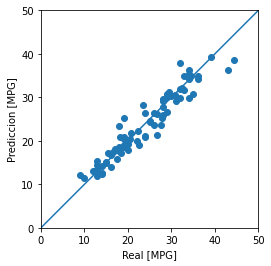

In [14]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('Real [MPG]')
plt.ylabel('Prediccion [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)